### **Time Series forecasting using Tensorflow**

In [1]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

import important_functionalities as impf
import time_series_functionalities as tsf

2025-03-27 11:04:12.051560: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### RESULTS:
baseline_results = {'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

model_1_results = {'mae': 568.06366,
 'mse': 1159591.9,
 'rmse': 1076.8435,
 'mape': 2.5265791,
 'mase': 0.9979305}

model_2_results = {'mae': 597.3115,
 'mse': 1246714.0,
 'rmse': 1116.5635,
 'mape': 2.696134,
 'mase': 1.0441062}

In [3]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

In [4]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


**18. Building Model 3 (same as model 1) (horizon = 7, window = 30)**

In [5]:
#  using the dataframe of bit-coin prices
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

# WINDOWING 
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = tsf.make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

# train-test split without windowing
train_percent = 80
split_size = int(train_percent*0.01*len(timesteps))
X_train,y_train = timesteps[:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]

# create train and test windows split
train_windows,test_windows,train_labels,test_labels = tsf.make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [6]:
# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,savepath='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=f'{savepath}/{model_name}.keras',
                                              verbose = 0,
                                              monitor='val_loss',
                                              save_best_only = True
                                              )

In [7]:
# 1. model creation
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')
], name='model_3')

# 2. model compiling
model_3.compile(loss = 'mae',optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# 3. fit the model
model_3.fit(x=train_windows,
            y=train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            verbose = 1,
            callbacks=[create_model_checkpoint(model_3.name)]
            )

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2470.7061 - mae: 2470.7061 - mse: 23044650.0000 - val_loss: 3326.1267 - val_mae: 3326.1267 - val_mse: 28407118.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 656.9440 - mae: 656.9440 - mse: 1877332.2500 - val_loss: 2483.8247 - val_mae: 2483.8247 - val_mse: 17821776.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 448.8234 - mae: 448.8234 - mse: 1042320.8125 - val_loss: 2123.8652 - val_mae: 2123.8652 - val_mse: 13271280.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 403.8755 - mae: 403.8755 - mse: 853451.3125 - val_loss: 1978.3507 - val_mae: 1978.3507 - val_mse: 11737472.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 372.7224 - mae: 372.7224 - mse: 723087.1875 - val_loss: 1805.2296 - val_mae: 1805.2296 - val_mse: 10011240.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 345.9706 - mae: 345.9706 - mse: 620175.7500 - val_loss: 1621.6770 - val_mae: 16

In [8]:
model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,615 (57.09 KB)

 Trainable params: 4,871 (19.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,744 (38.07 KB)

In [9]:
model_3.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 661.4255 - mae: 661.4255 - mse: 1640096.6250


[1277.1759033203125, 1277.1759033203125, 5581812.5]

In [10]:
# load in saved best performing model_1 & model_2 and evaluate it on test data
model_3 = tf.keras.models.load_model(f'model_experiments/{model_3.name}.keras')

In [11]:
model_3.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 656.7603 - mae: 656.7603 - mse: 1631742.7500 


[1272.8289794921875, 1272.8289794921875, 5554035.5]

In [12]:
# making forcasts with the model_1 on test dataset
def make_preds(model,input_data):
    '''
    Uses model to make predictions on input data
    '''

    forcast = model.predict(input_data)
    return tf.squeeze(forcast) # return 1D array of predictions

model_3_preds=make_preds(model_3,test_windows)
len(model_3_preds),model_3_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(551,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[9614.765 , 9466.554 , 9771.168 , 9547.867 , 9746.717 , 9503.065 ,
         9447.132 ],
        [9227.712 , 9244.69  , 9174.597 , 9358.271 , 9499.219 , 9222.273 ,
         9061.121 ],
        [9040.8   , 9034.405 , 8831.223 , 9084.104 , 9193.428 , 9012.751 ,
         8870.424 ],
        [9247.395 , 9104.54  , 8907.176 , 9184.814 , 9186.815 , 9339.914 ,
         8901.46  ],
        [9180.42  , 8967.13  , 8867.527 , 9081.613 , 9064.686 , 9250.498 ,
         8684.581 ],
        [9121.814 , 9003.179 , 9262.577 , 9174.142 , 9069.296 , 9250.106 ,
         8746.979 ],
        [9154.696 , 9125.248 , 9217.018 , 9139.337 , 9032.568 , 9201.091 ,
         8714.873 ],
        [8861.213 , 8913.7295, 9011.789 , 8866.023 , 8790.664 , 8753.93  ,
         8643.932 ],
        [8776.657 , 8878.1875, 8457.887 , 8682.207 , 8566.1   , 8460.119 ,
         8324.193 ],
        [8762.161 , 8664.585 , 8369.054 , 8533.837 , 8463.475 , 8415.352 ,
     

In [13]:
model_3_results = tsf.evaluate_time_series(tf.squeeze(test_labels),model_3_preds)
model_3_results

{'mae': 1272.8289,
 'mse': 5554035.5,
 'rmse': 2356.7002,
 'mape': 5.8320484,
 'mase': 2.2649276}

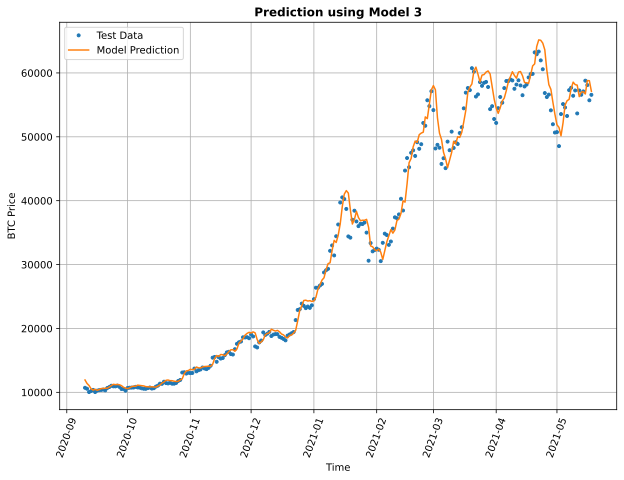

In [30]:
# plotting model_3 predictions
offset = 300
end = None
plt.figure(figsize=(10,7))

# account for test_window offset and index into test_labels to ensure correct plotting
tsf.plot_time_series(timesteps = X_test[-len(test_windows):] , values = test_labels[:,0],start = offset,end=end,label = "Test Data",format='.')
tsf.plot_time_series(timesteps = X_test[-len(test_windows):] , values = tf.reduce_mean(model_3_preds,axis=1),start = offset,end=end,label = "Model Prediction", format='-',xtick_rotation=70,ylabel='BTC Price')
plt.title("Prediction using Model 3",fontsize = 12, fontweight='bold')
plt.show()

***-- CONTD IN NEXT NOTEBOOK --***